# leading exp is exp903. Results from exp903_2 are pretty decent. 

In [2]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch



import os
import sys
import glob
import h5py
import numpy as np
import math


import torch
from torch import nn
from torch.autograd import Variable
from torchvision import transforms
from torchvision.utils import save_image
from torch.utils.data import Dataset , DataLoader
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.model_zoo as model_zoo
from tqdm import tqdm
import tensorboard
import tensorboardX
from torch.utils.tensorboard import SummaryWriter


from log import Logger
from data import gDataset, trainDataset, testDataset
from util import r2, mse, rmse, mae, pp_mse, pp_rmse, pp_mae
from model import autoencoder_6,  autoencoder_666,autoencoder_999
from sklearn.decomposition import PCA
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def showres(path):
    img_data_tensor=torch.load(path)
    img_data= img_data_tensor[4].numpy()
    img_data.resize(56,56)
    plt.imshow(img_data)
    return img_data

def to_img(x):   # image size 56 * 56 
    x = x.view(x.size(0), 1, 56, 56)
    return x



test_dataset = testDataset()
test_dataloader= DataLoader(dataset=test_dataset, batch_size=3000,shuffle=True)

In [2]:
num=19990

# So far, the best training result from regularizing Z is from exp903 with regularizing by L1(Z) * 1e-7

regularization factor is 1e-7
finished
there are 2046 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 258 non-zero parameters.


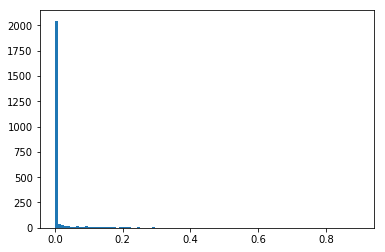

In [21]:

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp903_{}.pth'.format(num)))    
model.eval()

print ("regularization factor is 1e-7")


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output = model.encoder(test_img)   #latent 
    
a=test_output.data.cpu().numpy()

print("finished")
dt_test = a.reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
plt.hist(mean_expZ,bins=100);

# num=3400 ~500
#6800  700
#19000 1200 


counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

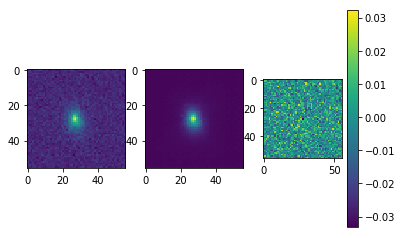

In [19]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp903_test_x_19830.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp903_test_x_hat_19830.pt') 
plt.subplot(1, 3, 3)
plt.imshow(a1-a2)
plt.colorbar()

regularization factor is 1e-8
finished
there are 841 out of 2034 parameters in Z are zeros. 
Therefore, latent Z has 1463 non-zero parameters.


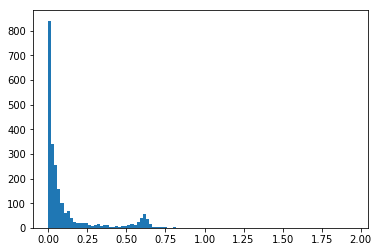

In [22]:

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp905_{}.pth'.format(num)))    
model.eval()
print ("regularization factor is 1e-8")


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output = model.encoder(test_img)   #latent 
    
a=test_output.data.cpu().numpy()

print("finished")
dt_test = a.reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
plt.hist(mean_expZ,bins=100);

# num=3400 ~500
#6800  700
#19000 1200 


counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2034 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

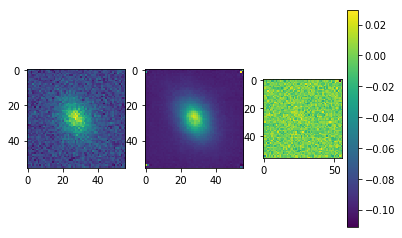

In [23]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp905_test_x_19990.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp905_test_x_hat_19990.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

regularization factor is 1e-6
finished
there are 2092 out of 2034 parameters in Z are zeros. 
Therefore, latent Z has 212 non-zero parameters.


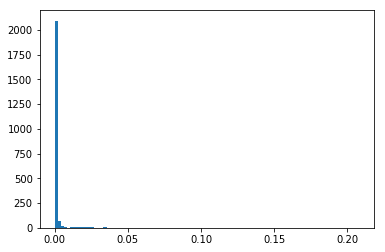

In [24]:

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp904_{}.pth'.format(num)))    
model.eval()
print ("regularization factor is 1e-6")


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output = model.encoder(test_img)   #latent 
    
a=test_output.data.cpu().numpy()

print("finished")
dt_test = a.reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
plt.hist(mean_expZ,bins=100);

# num=3400 ~500
#6800  700
#19000 1200 


counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2034 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

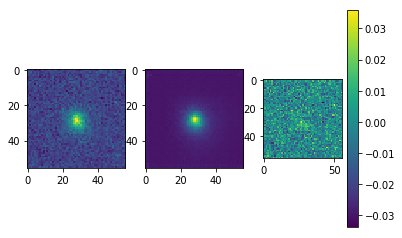

In [34]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp904_test_x_19850.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp904_test_x_hat_19850.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

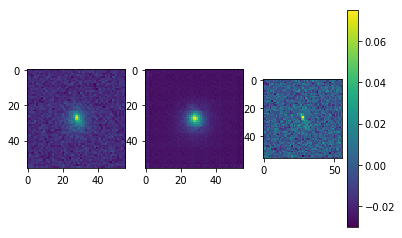

In [38]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp904_test_x_19830.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp904_test_x_hat_19830.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

# Exp 902 failed, as shown in below. Regularization factor is too big and AE is not able to reconstuct galaxy image. 

regularization factor is 1e-5
finished
there are 2102 out of 2034 parameters in Z are zeros. 
Therefore, latent Z has 202 non-zero parameters.


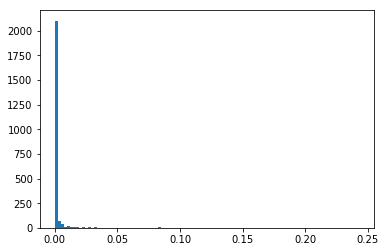

In [41]:

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp902_{}.pth'.format(num)))    
model.eval()
print ("regularization factor is 1e-5")


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output = model.encoder(test_img)   #latent 
    
a=test_output.data.cpu().numpy()

print("finished")
dt_test = a.reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
plt.hist(mean_expZ,bins=100);

# num=3400 ~500
#6800  700
#19000 1200 


counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2034 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

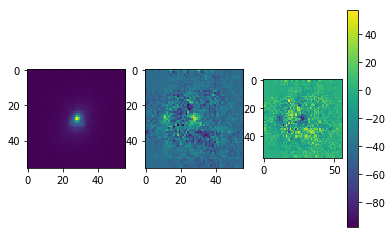

In [40]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp902_test_x_19860.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp902_test_x_hat_19860.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

In [12]:
a=np.array((0,1,2,3,4,5,6,7,8))

In [17]:
a[:5]

array([0, 1, 2, 3, 4])

In [27]:
m=torch.ones([64,5,1,1])

In [48]:
b= torch.ones([64,256,1,1]);
b[:,:5,:,:].shape

torch.Size([64, 5, 1, 1])

In [49]:
b.shape

torch.Size([64, 256, 1, 1])

In [55]:
b.view(64,256,1,1).shape

torch.Size([64, 256, 1, 1])

In [21]:
c=torch.zeros(5)

In [22]:
b[:5]-c

tensor([1., 1., 1., 1., 1.])

In [23]:
b.size()

torch.Size([9])

# Results from 9/26/19

In [1]:
num=10000

regularization factor is 1e-7
finished
there are 1953 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 351 non-zero parameters.


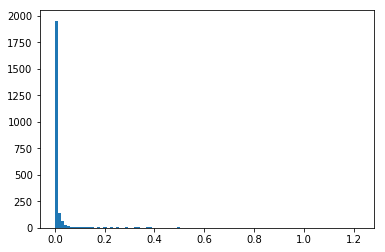

In [3]:

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp903_3_{}.pth'.format(num)))    
model.eval()

print ("regularization factor is 1e-7")


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output = model.encoder(test_img)   #latent 
    
a=test_output.data.cpu().numpy()

print("finished")
dt_test = a.reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
plt.hist(mean_expZ,bins=100);

# num=3400 ~500
#6800  700
#19000 1200 


counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

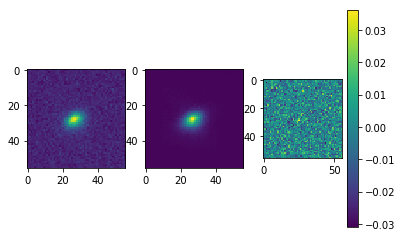

In [11]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp903_3_test_x_10510.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp903_3_test_x_hat_10510.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

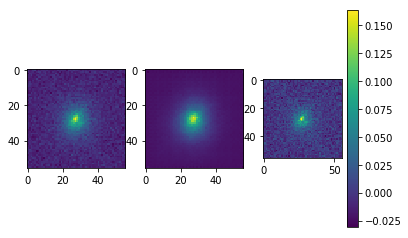

In [36]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp903_3_test_x_10550.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp903_3_test_x_hat_10550.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

regularization factor is 1e-7
finished
there are 2079 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 225 non-zero parameters.


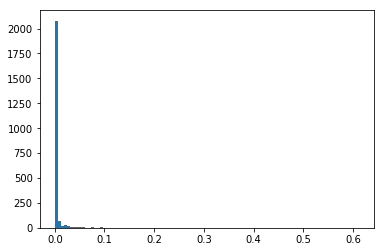

In [12]:

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp903_2_{}.pth'.format(num)))    
model.eval()

print ("regularization factor is 1e-7")


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output = model.encoder(test_img)   #latent 
    
a=test_output.data.cpu().numpy()

print("finished")
dt_test = a.reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
plt.hist(mean_expZ,bins=100);

# num=3400 ~500
#6800  700
#19000 1200 


counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

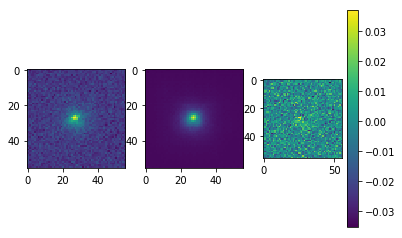

In [16]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp903_2_test_x_11250.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp903_2_test_x_hat_11250.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

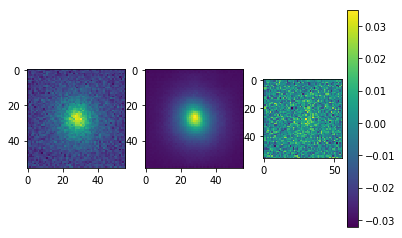

In [39]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp903_2_test_x_11750.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp903_2_test_x_hat_11750.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

regularization factor is 1e-7
finished
there are 2152 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 152 non-zero parameters.


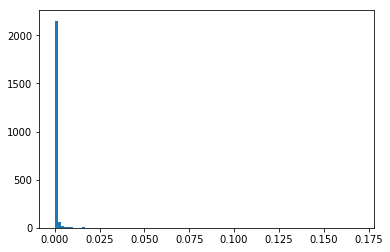

In [17]:

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp904_2_{}.pth'.format(num)))    
model.eval()

print ("regularization factor is 1e-7")


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output = model.encoder(test_img)   #latent 
    
a=test_output.data.cpu().numpy()

print("finished")
dt_test = a.reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
plt.hist(mean_expZ,bins=100);

# num=3400 ~500
#6800  700
#19000 1200 


counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

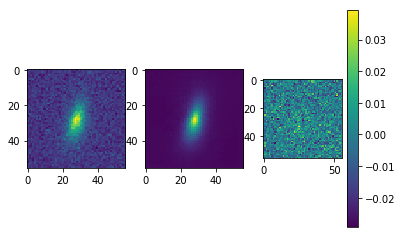

In [28]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp904_2_test_x_6190.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp904_2_test_x_hat_6190.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

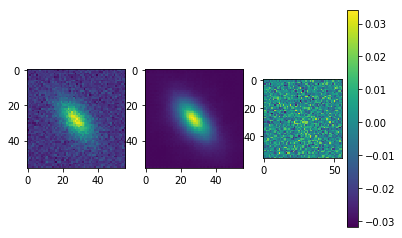

In [19]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp904_2_test_x_10390.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp904_2_test_x_hat_10390.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

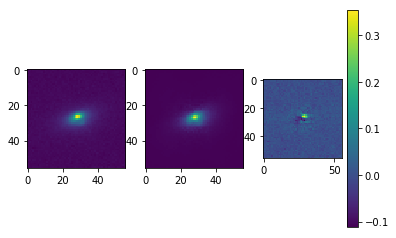

In [25]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp904_2_test_x_11970.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp904_2_test_x_hat_11970.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

regularization factor is 1e-7
finished
there are 2009 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 295 non-zero parameters.


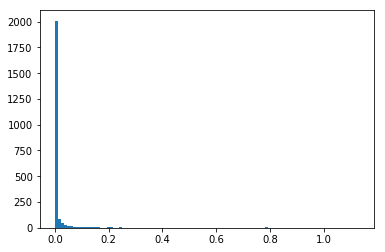

In [26]:

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp907_{}.pth'.format(num)))    
model.eval()

print ("regularization factor is 1e-7")


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output = model.encoder(test_img)   #latent 
    
a=test_output.data.cpu().numpy()

print("finished")
dt_test = a.reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
plt.hist(mean_expZ,bins=100);

# num=3400 ~500
#6800  700
#19000 1200 


counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

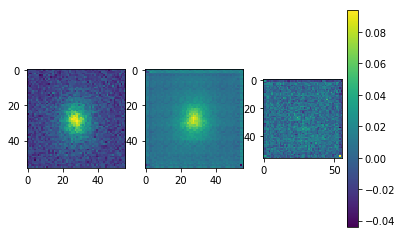

In [27]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp907_test_x_6000.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp907_test_x_hat_6000.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

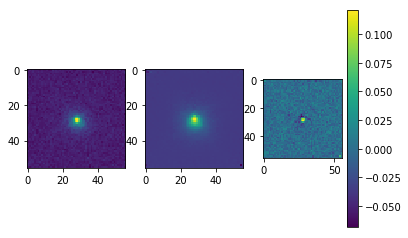

In [29]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp907_test_x_10400.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp907_test_x_hat_10400.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

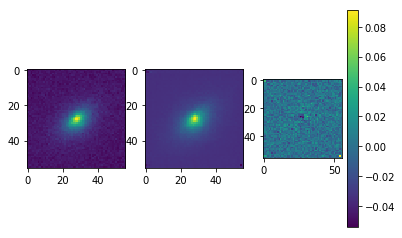

In [39]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp907_test_x_6100.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp907_test_x_hat_6100.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

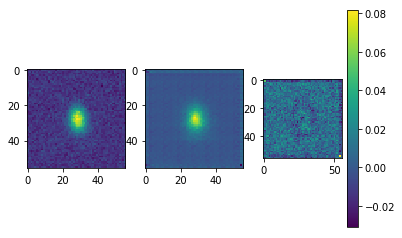

In [42]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp907_test_x_6160.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp907_test_x_hat_6160.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

regularization factor is 1e-7
finished
there are 1212 out of 2304 parameters in Z are zeros. 
Therefore, latent Z has 1092 non-zero parameters.


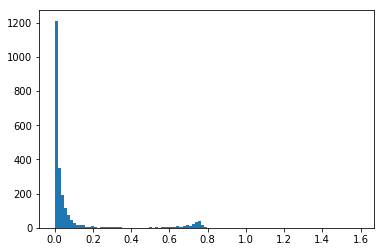

In [30]:

model = autoencoder_999().cuda()   ###### AE model 
model.load_state_dict(torch.load('gal_img924/exp906_{}.pth'.format(num)))    
model.eval()

print ("regularization factor is 1e-7")


for data in test_dataloader:
    test_img = data
    test_img = test_img.type(torch.float32)
    test_img = test_img.view(test_img.size(0), 1,56,56)
    test_img = test_img.cuda()
    test_output = model.encoder(test_img)   #latent 
    
a=test_output.data.cpu().numpy()

print("finished")
dt_test = a.reshape([3000,-1])
mean_expZ=np.mean(dt_test,axis=0)
plt.hist(mean_expZ,bins=100);

# num=3400 ~500
#6800  700
#19000 1200 


counts,edges = np.histogram(mean_expZ,bins=100)
print("there are",counts[0],"out of 2304 parameters in Z are zeros. ")
print("Therefore, latent Z has", 2304-counts[0],"non-zero parameters.")

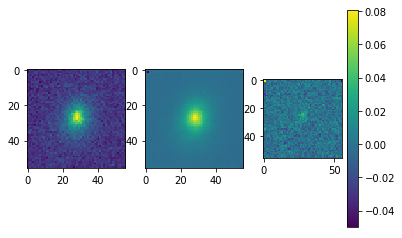

In [32]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp906_test_x_10560.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp906_test_x_hat_10560.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()

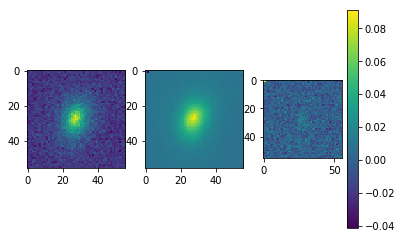

In [34]:
plt.subplot(1, 3, 1)
a1=showres('gal_img924/exp906_test_x_11580.pt')
plt.subplot(1, 3, 2)  
a2=showres('gal_img924/exp906_test_x_hat_11580.pt') 
plt.subplot(1, 3, 3) 
plt.imshow(a1-a2)
plt.colorbar()